In [1]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading,replay_run

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
functions.set_plotting_defaults()
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## Run all sessions

In [3]:
importlib.reload(replay_run)

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df[df.basepath.str.contains('GrosmarkAD')]
 
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'
replay_run.main(df,save_path,parallel=True)

In [95]:
# # plt.plot(tc.data)

# plt.imshow(tc.ratemap[np.array(tc.get_peak_firing_order_ids())-1,:],aspect='auto',interpolation='nearest',vmax=5)
# plt.colorbar()
# plt.show()

## Load all data

In [3]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    df = df.append(results['df'],ignore_index=True)

In [93]:
df

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,dist_rat_start,dist_rat_end
0,7.2344,7.3312,7.2776,692.400130,0.0968,162.842051,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-0.301887,32.905660,0.953364,0.939374,0.905660,15.094340,0.301887,NaN,NaN,NaN
1,26.9032,27.0112,26.9368,691.066738,0.1080,153.430269,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,13.886792,24.754717,0.951366,0.668887,55.547170,694.339623,13.886792,NaN,NaN,NaN
2,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.328841,276.010782,0.001999,0.009993,109.973046,916.442049,18.328841,NaN,NaN,NaN
3,55.2992,55.3992,55.3888,416.186103,0.1000,145.450890,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,13.886792,-156.981132,0.663558,0.805463,55.547170,694.339623,13.886792,NaN,NaN,NaN
4,203.6992,203.8064,203.7792,321.720041,0.1072,185.214900,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,18.113208,-324.226415,0.508994,0.414390,72.452830,905.660377,18.113208,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,35185.7176,35185.8208,35185.7472,541.517999,0.1032,136.443467,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,25.995649,-171604.531605,0.896736,0.786809,103.982595,1299.782435,34.660865,NaN,NaN,NaN
13720,35213.9024,35213.9840,35213.9488,531.870027,0.0816,124.002747,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,24.484274,-161802.660674,0.921386,0.666223,73.452821,1224.213688,24.484274,NaN,NaN,NaN
13721,35230.1416,35230.2432,35230.1624,408.787443,0.1016,158.530174,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,10.881899,-71891.268728,0.139907,0.116589,43.527598,544.094972,10.881899,NaN,NaN,NaN
13722,35262.5680,35262.6624,35262.5920,372.526411,0.0944,159.487343,bz_DetectSWR,120,1,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,...,4.231850,-27896.353795,0.175217,0.362425,12.695549,211.592490,4.231850,NaN,NaN,NaN


In [96]:
df['score_pval_col_cycle'] < 0.01

0        False
1        False
2         True
3        False
4        False
         ...  
13719    False
13720    False
13721    False
13722    False
13723    False
Name: score_pval_col_cycle, Length: 13724, dtype: bool

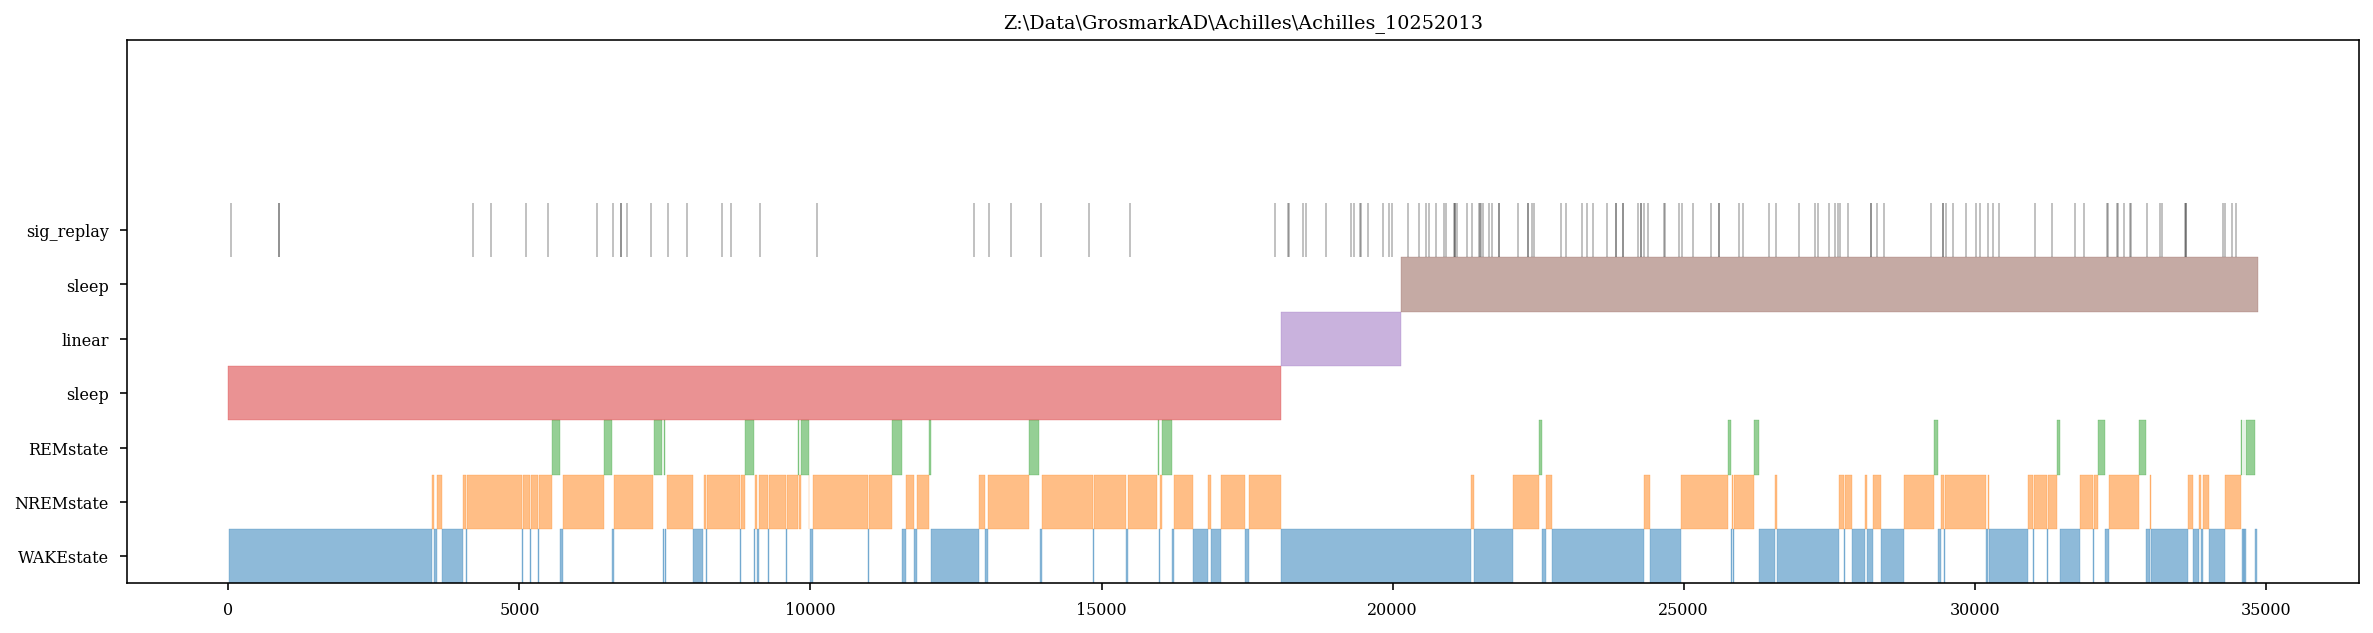

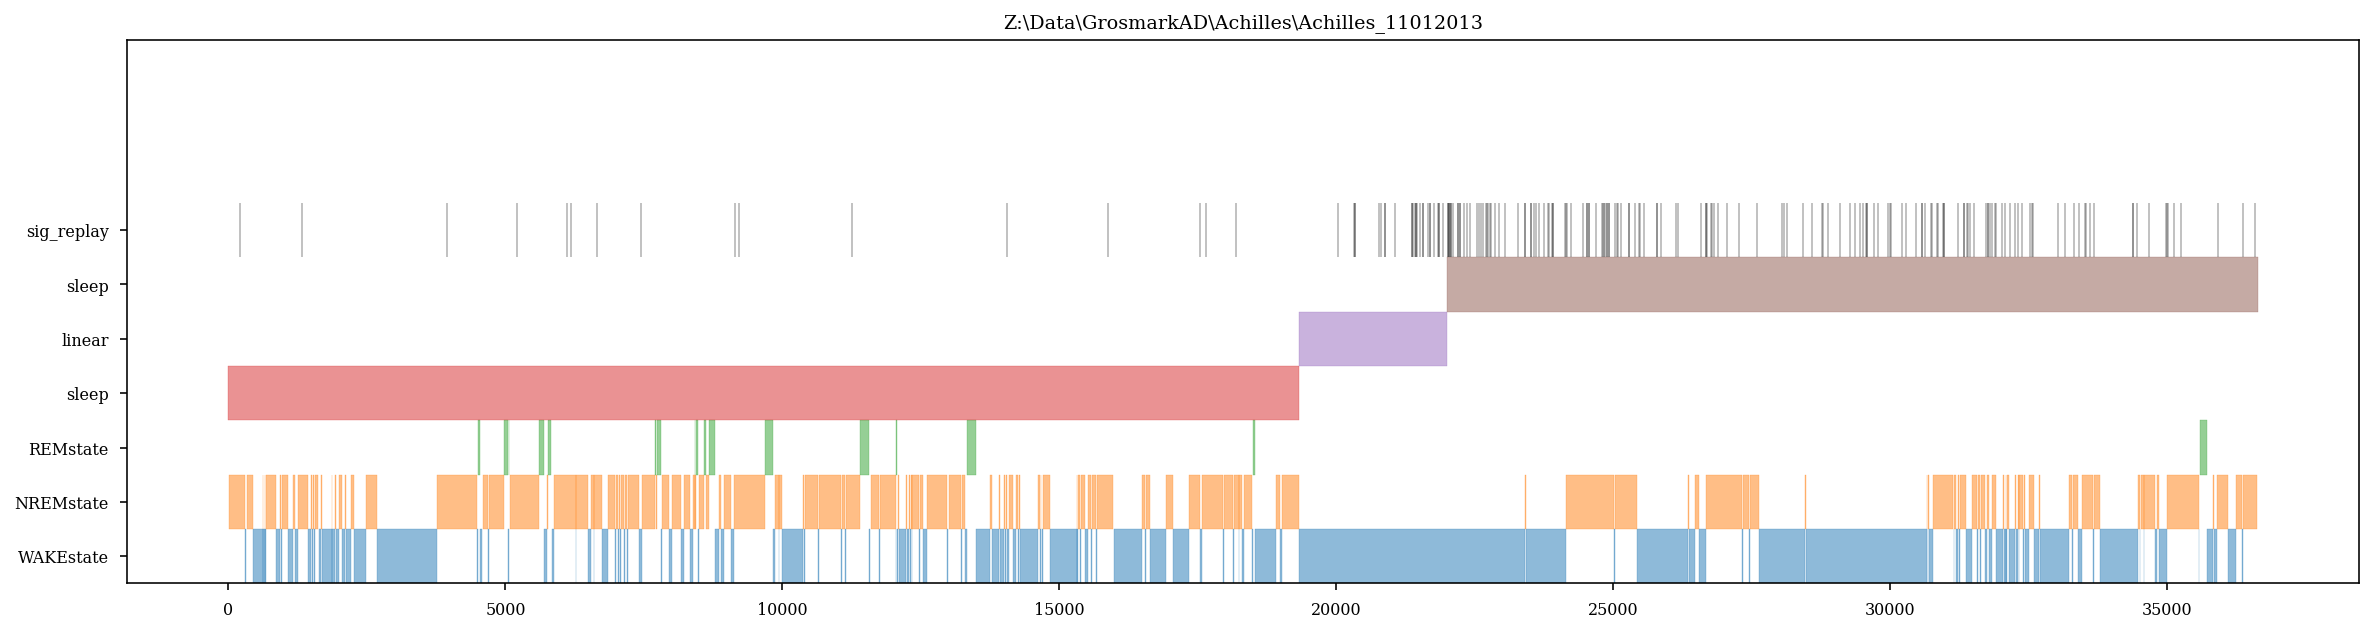

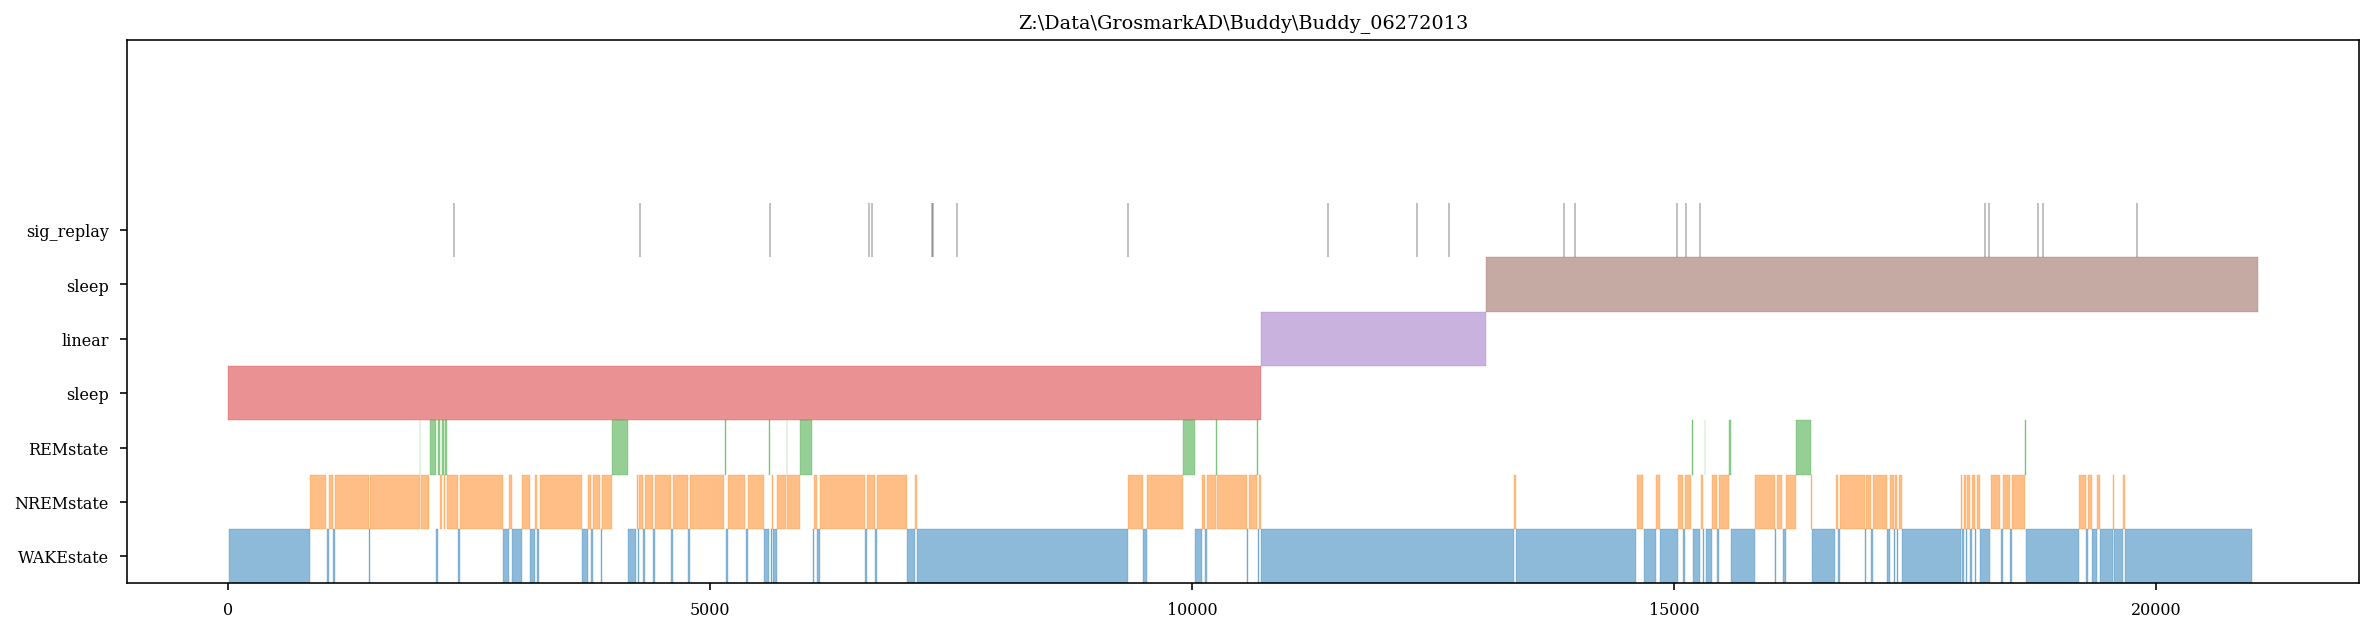

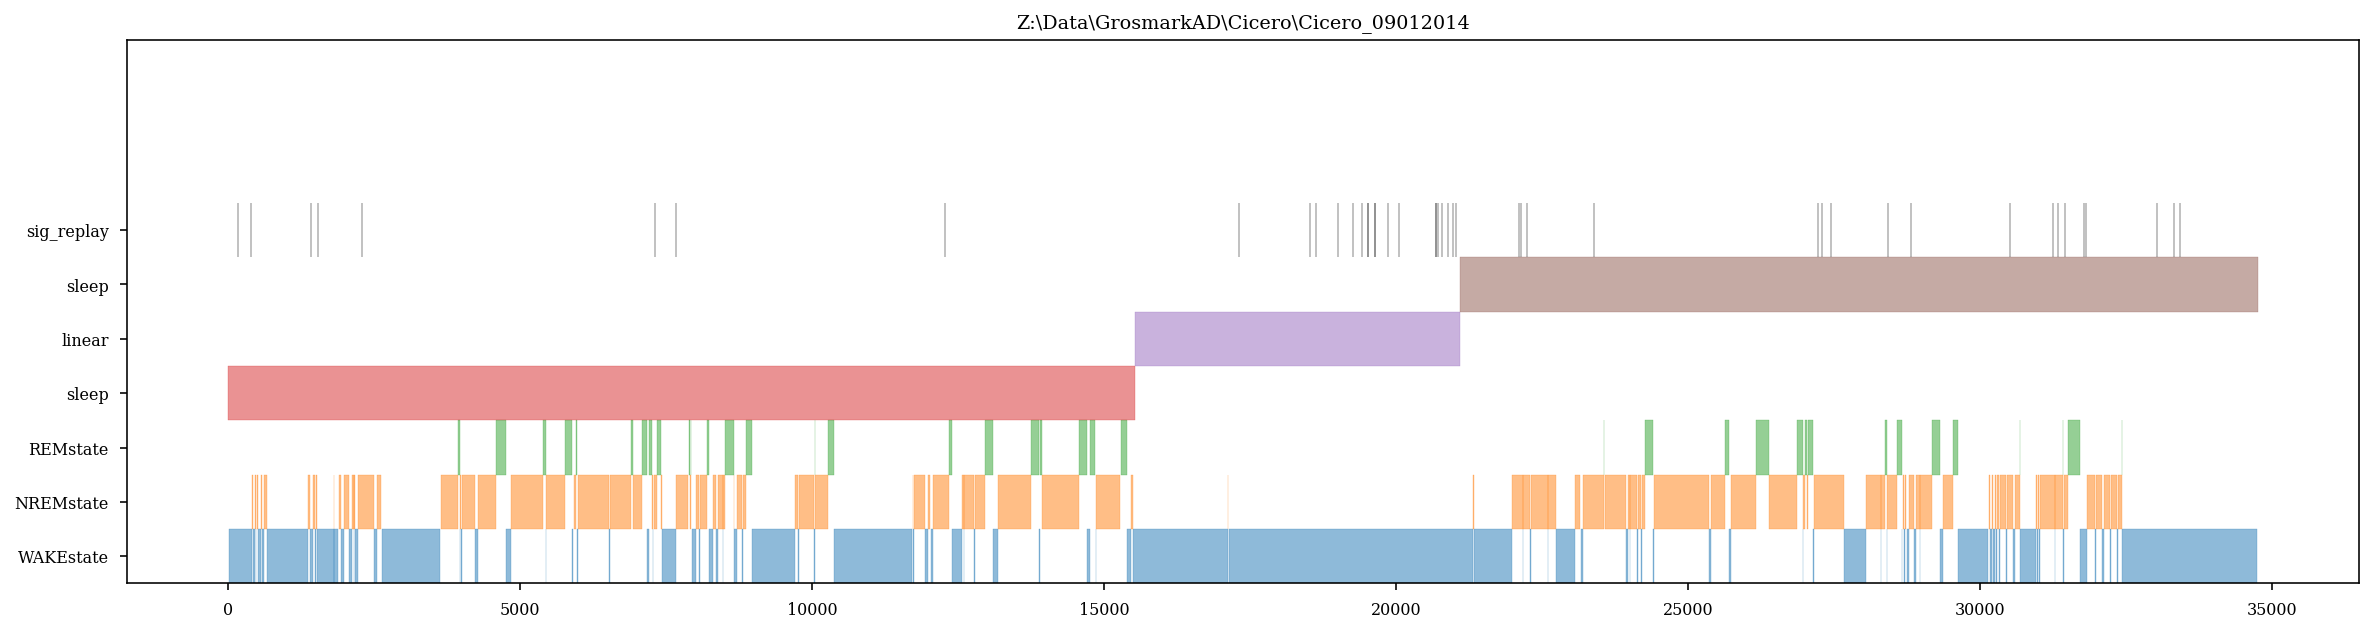

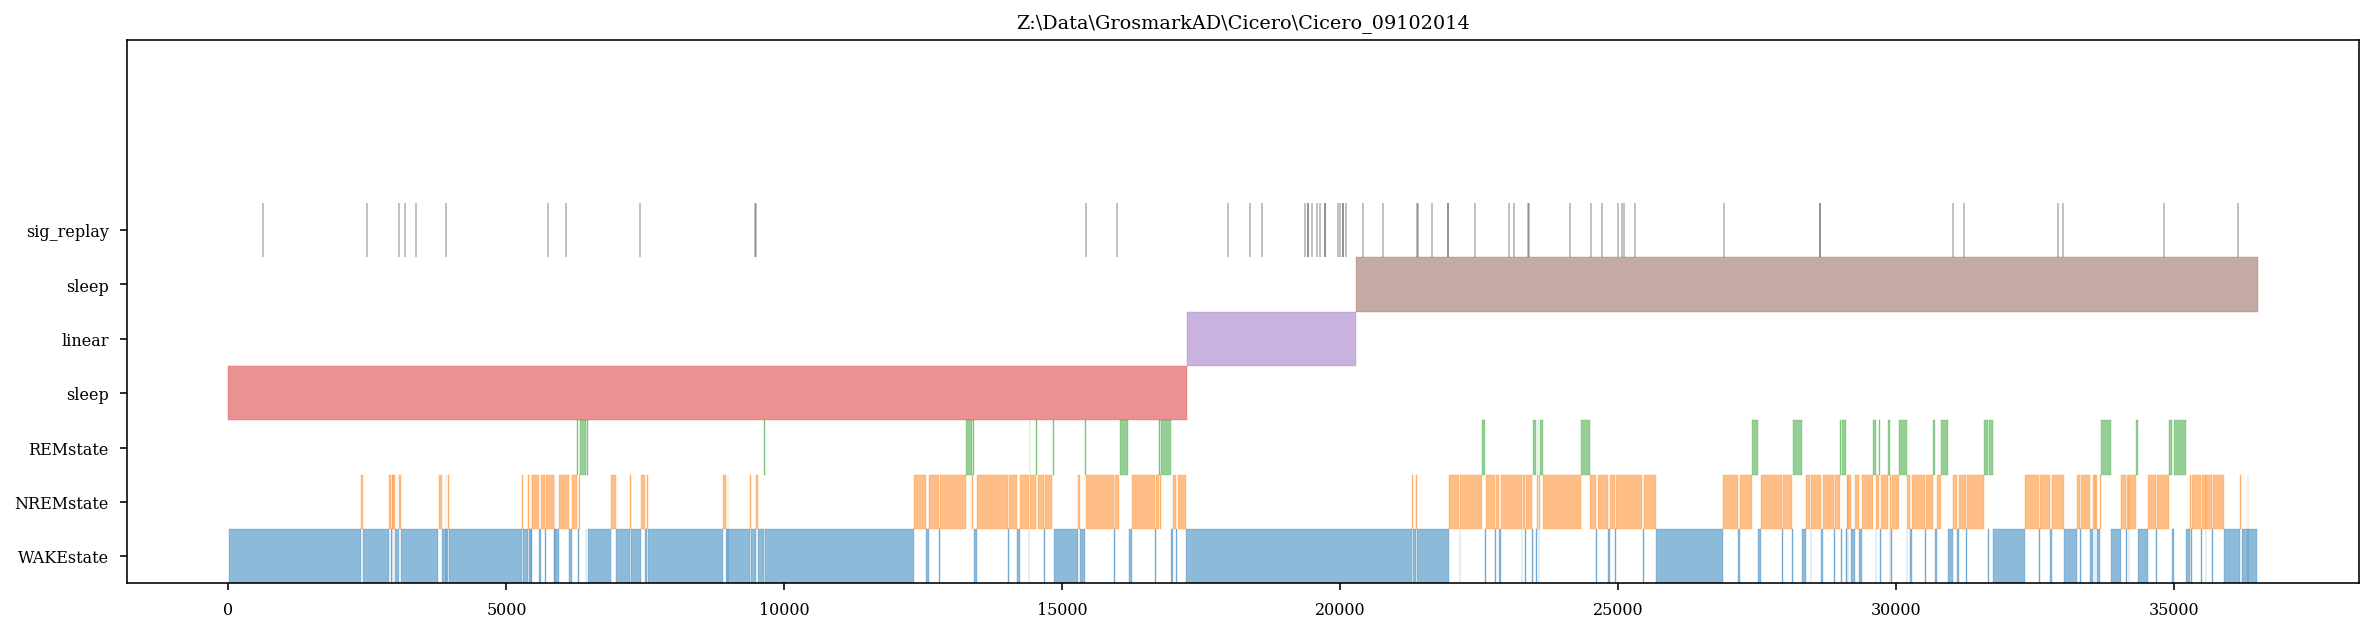

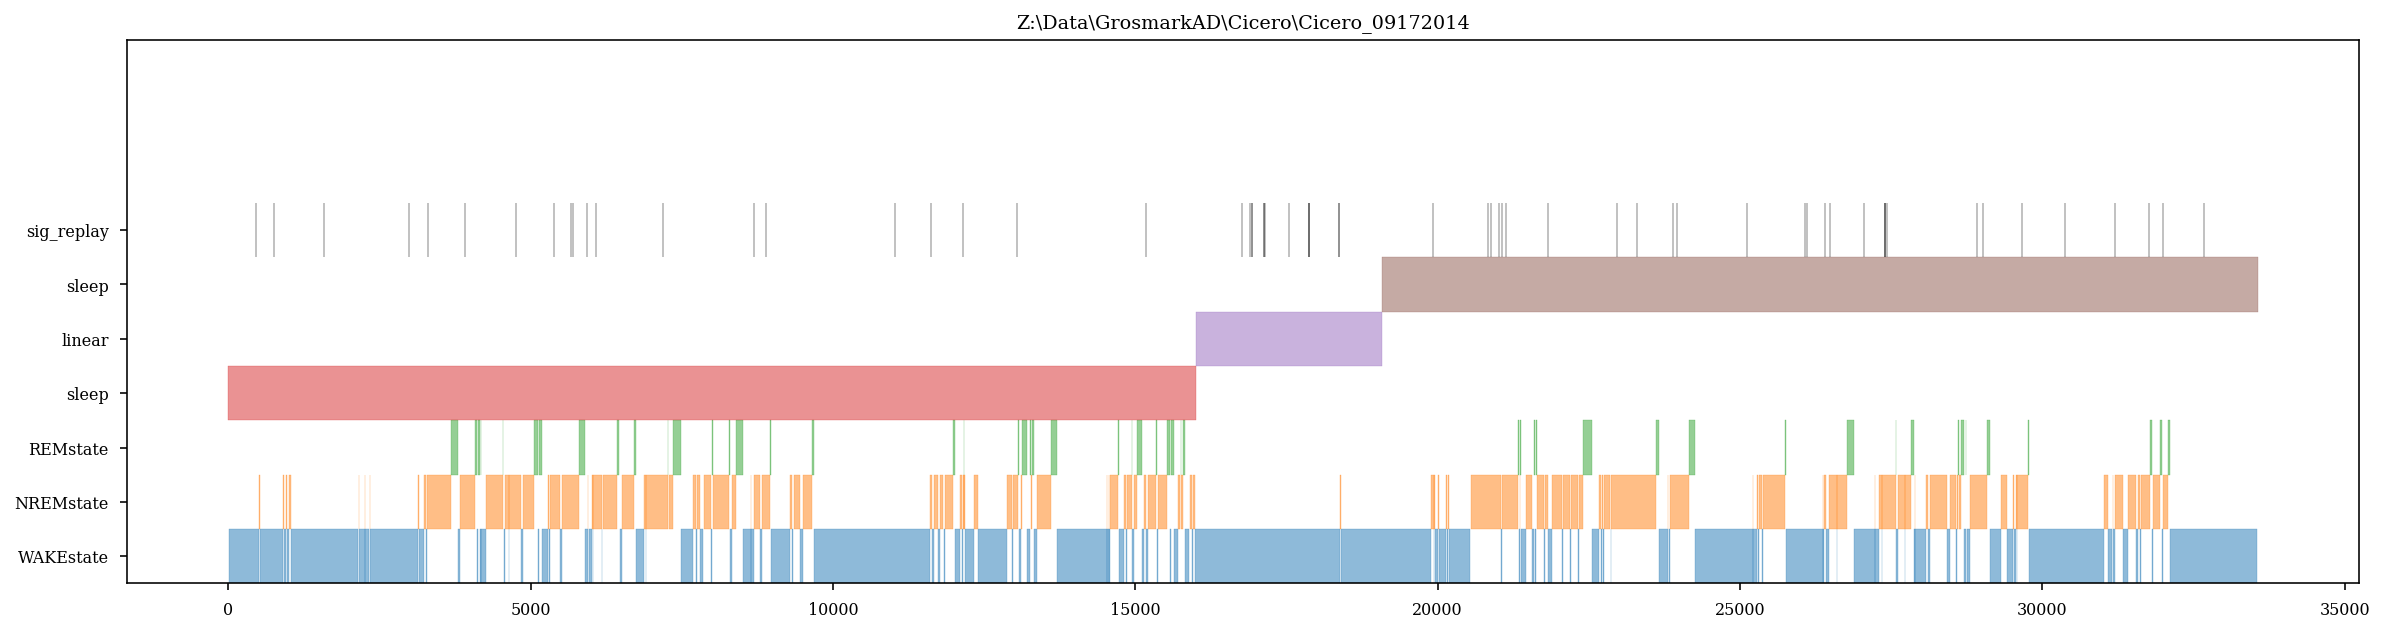

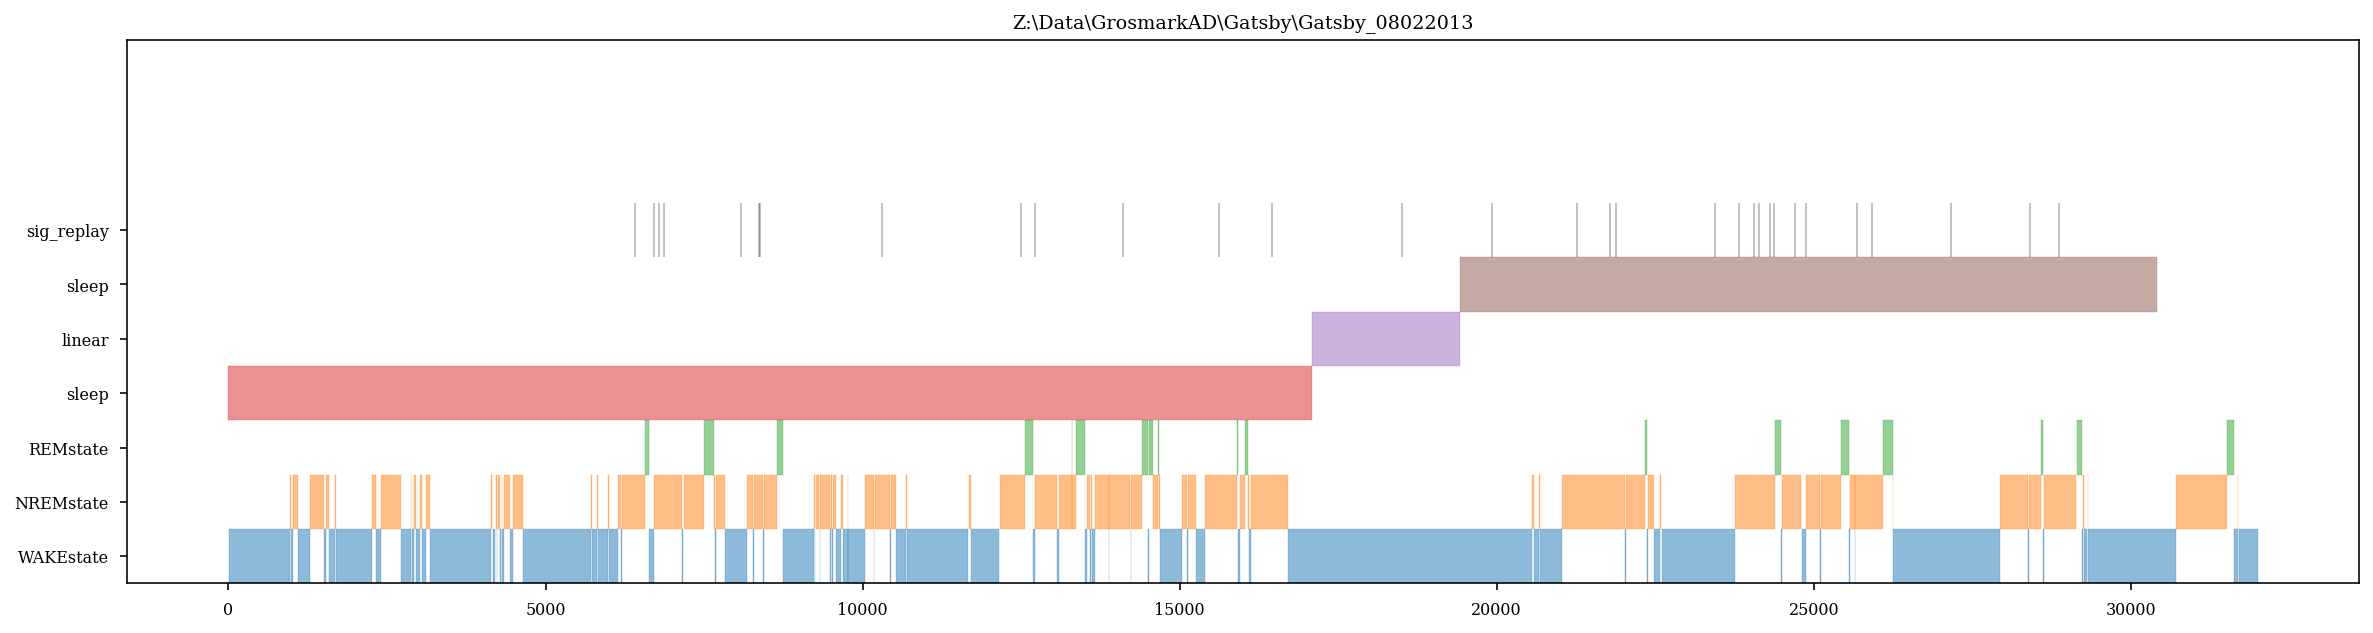

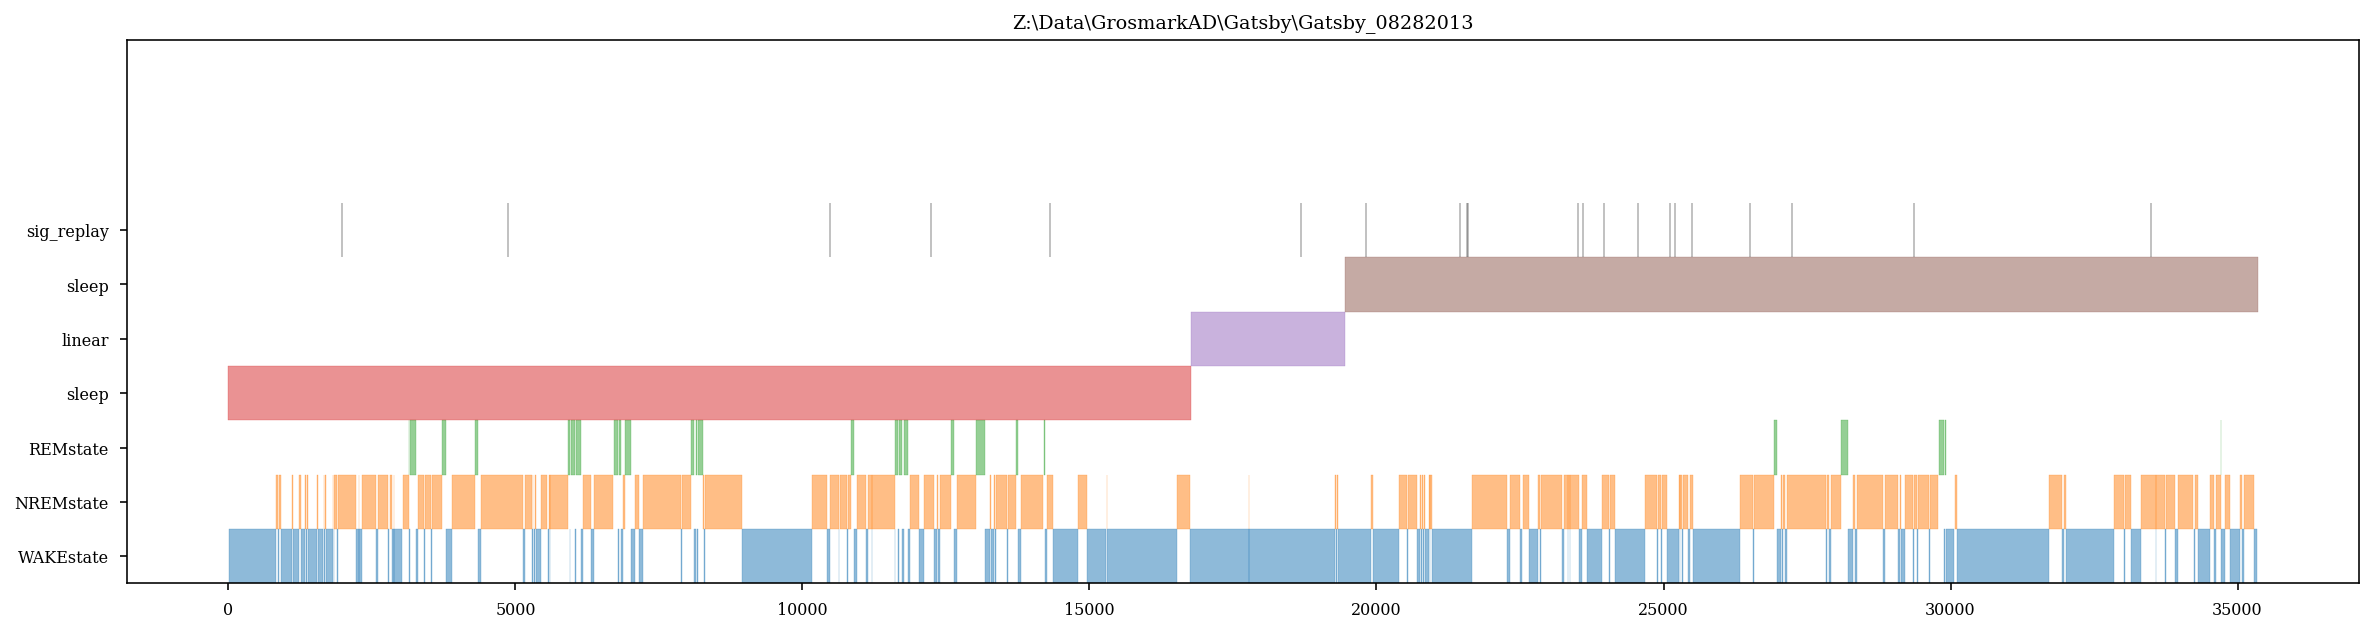

In [90]:
import matplotlib

def plot_sig_replay_over_epochs(results):

    plt.figure(figsize=(20,5))
    basepath = results['df'].basepath.unique()[0]

    states_dict = loading.load_SleepState_states(basepath)
    epoch_df = loading.load_epoch(basepath)

    cmap = matplotlib.cm.get_cmap('tab20')

    var_keys = ['WAKEstate','NREMstate','REMstate']

    y = np.arange(len(var_keys + list(epoch_df.environment))+2)*.1

    for i,key in enumerate(var_keys):
        for pair in states_dict[key]:
            plt.axvspan(pair[0], pair[1],y[i],y[i+1], alpha=0.5,color=cmap(i*.1))

    for ep in epoch_df.itertuples():
        i+=1
        plt.axvspan(ep.startTime, ep.stopTime,y[i],y[i+1], alpha=0.5,color=cmap(i*.1))


    temp_df = results['df'][(results['df']['score_pval_col_cycle'] < 0.01)]
    i+=1

    for ep in temp_df.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=1,color='k')

    # plt.grid() (results['df']['score_pval_time_swap'] < 0.05)
    # plt.plot(results['df'].peaks,(results['df']['score_pval_col_cycle'] < 0.01) ,'k',alpha=.5,label='sig. replay = 1')
    # plt.xlim(results['df'].peaks.min(),results['df'].peaks.max())
    # plt.legend()
    ax = plt.gca()
    ax.set_yticks(y[:-1]+.05)
    ax.set_yticklabels(var_keys + list(epoch_df.environment) + list(['sig_replay']))
    plt.title(basepath)  

sessions = glob.glob(save_path +os.sep+ '*.pkl')
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    plot_sig_replay_over_epochs(results)  
    

In [35]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]

In [79]:
# test = results['bst_placecells'][idx]
# # results['sta_placecells']
# test.bin_centers

any(results['df']['replay_type'] == np.nan)

False

In [4]:
sessions = glob.glob(save_path +os.sep+ '*.pkl')

with open(sessions[0], 'rb') as f:
    results = pickle.load(f)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


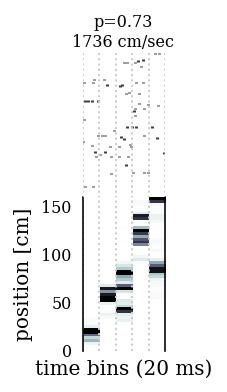

In [98]:
importlib.reload(replay_fig)

idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[2]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title) 

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


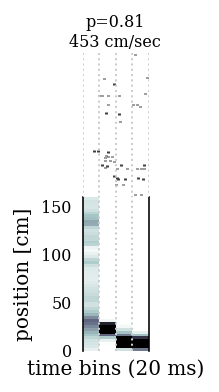

reverse


In [44]:
idxs = np.where((results['df']['replay_type'] == 'reverse') & (results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[1]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
# results['df'].replay_type

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


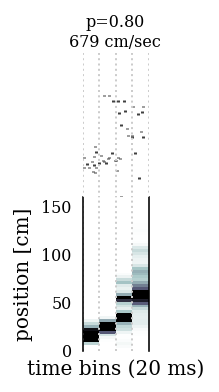

forward


In [45]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[31]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


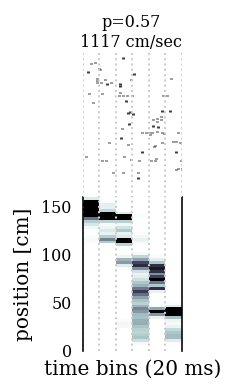

forward


In [46]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[29]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = (
        (results['df']['score_pval_col_cycle']<0.05) &
        (results['df']['score_pval_time_swap']<0.05)
        )
results['df'][idx]               

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,dist_rat_start,dist_rat_end
24,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.328841,276.010782,0.001999,0.009993,109.973046,916.442049,18.328841,NaN,NaN,NaN
227,862.1312,862.2456,862.1608,850.904118,0.1144,192.164774,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,34.716981,-3978.566038,0.019320,0.006662,138.867925,1735.849057,34.716981,NaN,NaN,NaN
228,862.1312,862.2456,862.1608,850.904118,0.1144,192.164774,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,34.716981,-4152.150943,0.013324,0.007328,138.867925,1735.849057,34.716981,NaN,NaN,NaN
261,960.9256,961.0640,960.9712,690.977610,0.1384,173.337576,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-10.954178,1570.875112,0.027981,0.035310,54.770889,547.708895,10.954178,NaN,NaN,NaN
539,2095.3560,2095.4424,2095.4232,378.692609,0.0864,176.284368,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-23.245283,6386.113208,0.041306,0.041972,69.735849,1162.264151,23.245283,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,33345.9768,33346.1384,33346.0552,686.269406,0.1616,161.658598,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,14.159928,-146645.283019,0.007995,0.016656,99.119497,707.996406,14.159928,NaN,NaN,NaN
10901,33636.1368,33636.2920,33636.2184,707.100262,0.1552,166.927743,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.652291,194103.935310,0.001999,0.003331,111.913747,932.614555,18.652291,NaN,NaN,NaN
10902,33636.1368,33636.2920,33636.2184,707.100262,0.1552,166.927743,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.652291,194234.501348,0.001999,0.001999,111.913747,932.614555,18.652291,NaN,NaN,NaN
11108,34270.2720,34270.4184,34270.2928,895.957985,0.1464,184.415552,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-23.180593,244448.625337,0.000666,0.005996,139.083558,1159.029650,23.180593,NaN,NaN,NaN


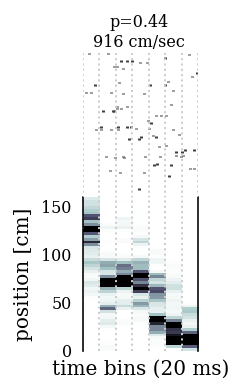

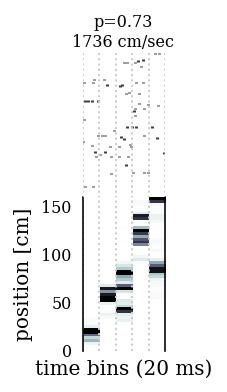

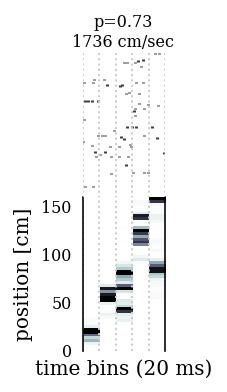

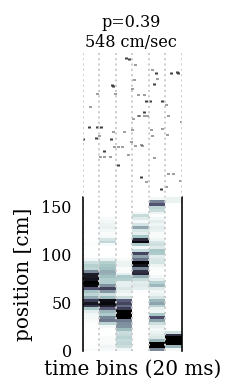

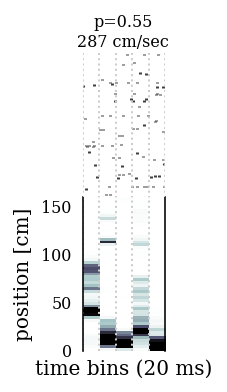

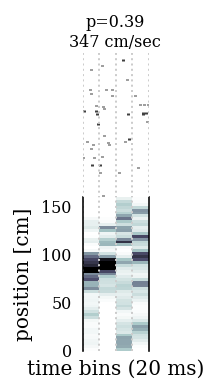

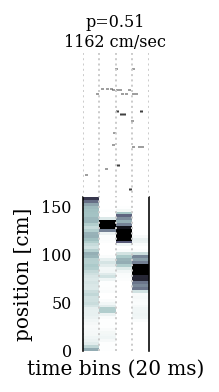

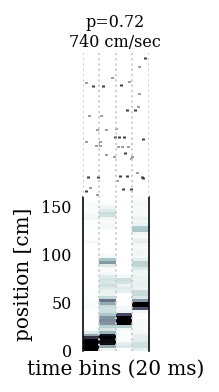

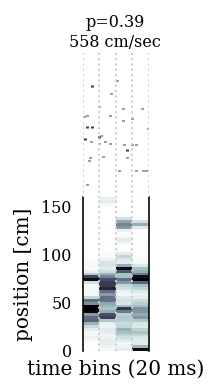

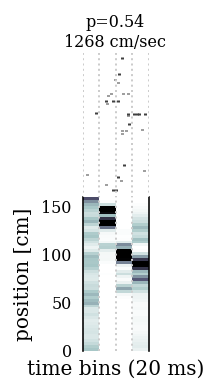

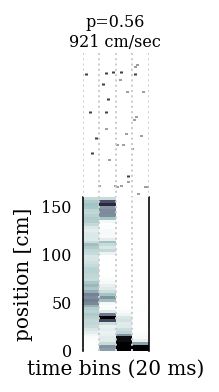

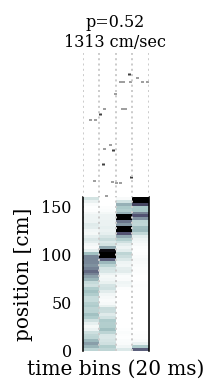

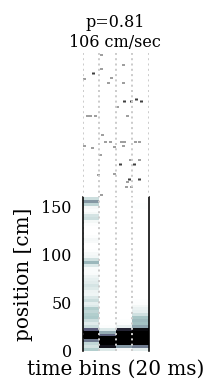

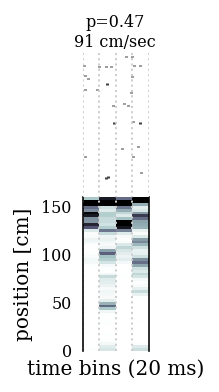

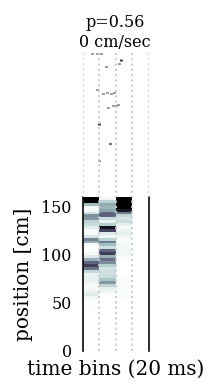

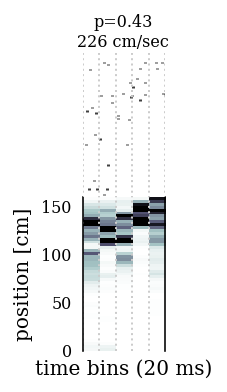

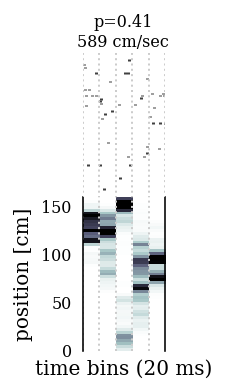

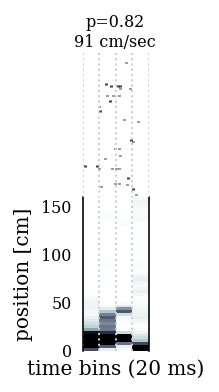

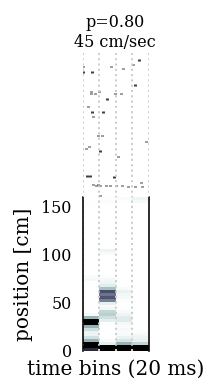

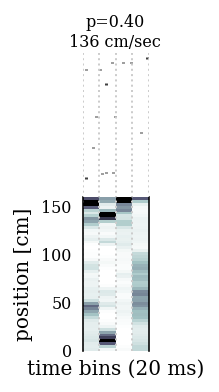

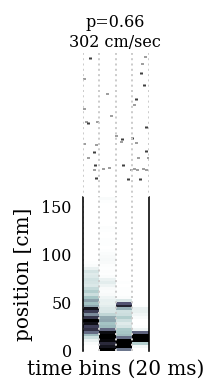

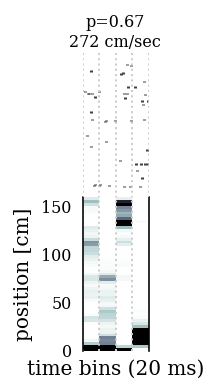

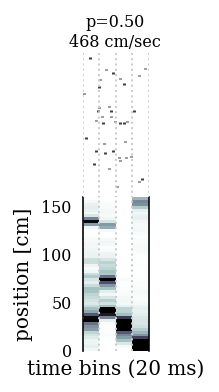

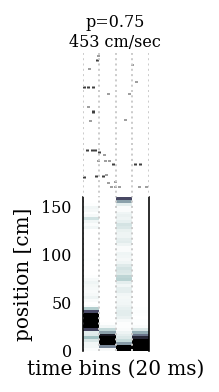

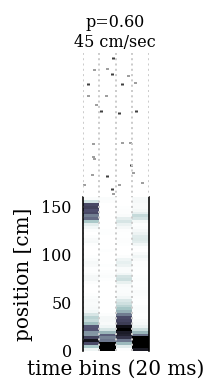

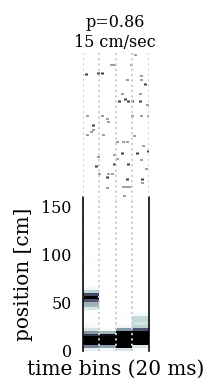

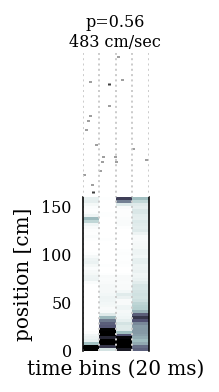

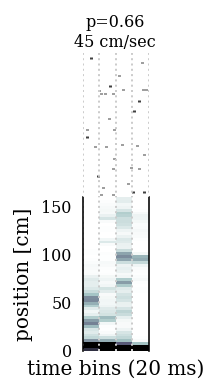

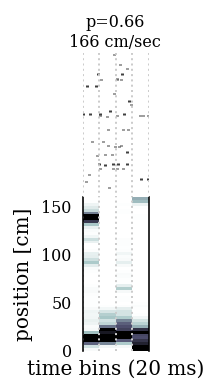

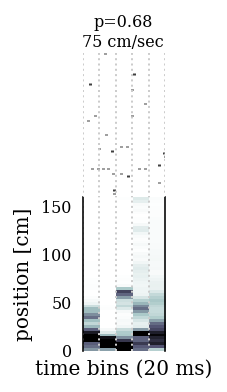

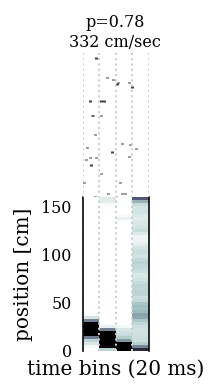

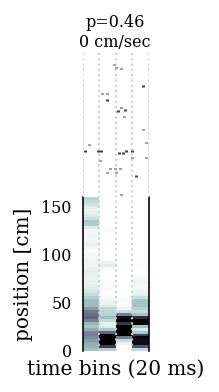

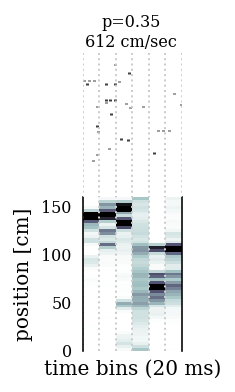

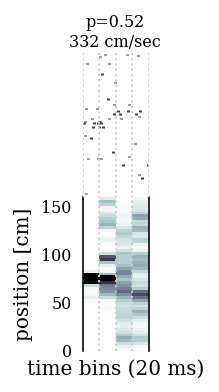

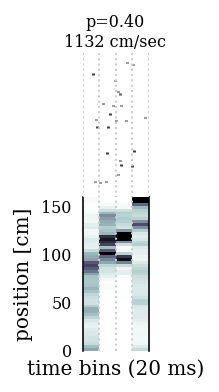

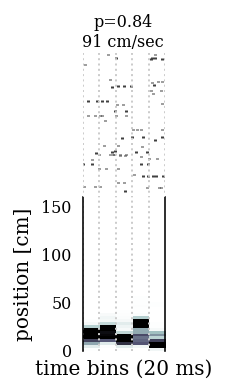

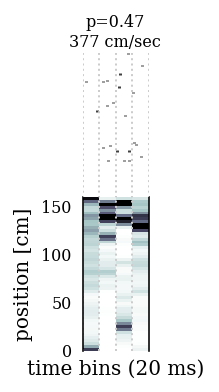

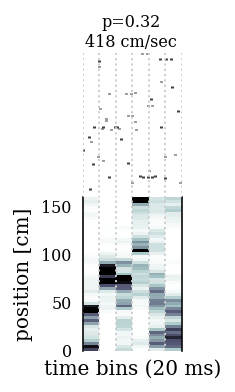

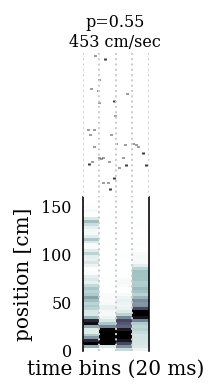

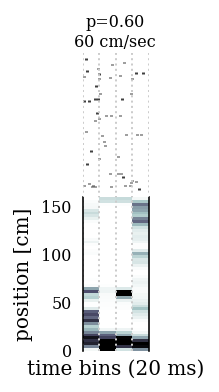

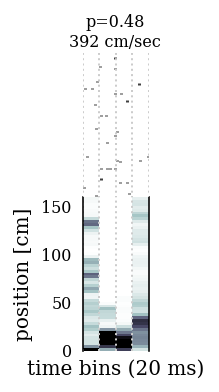

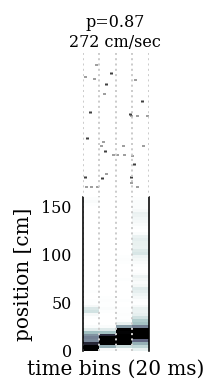

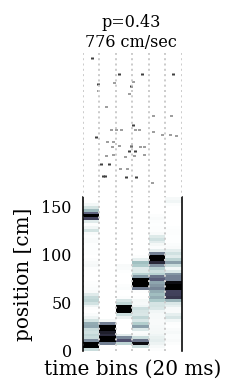

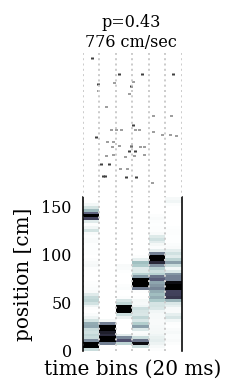

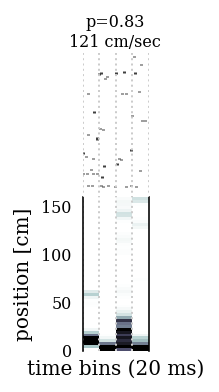

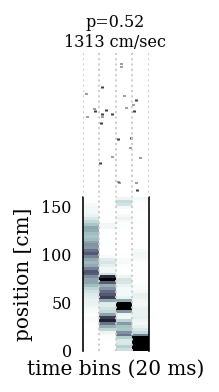

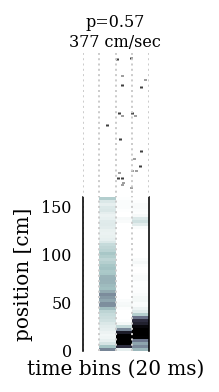

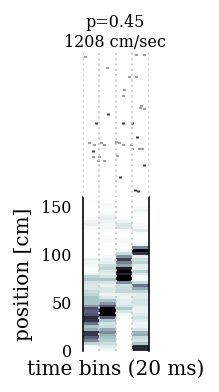

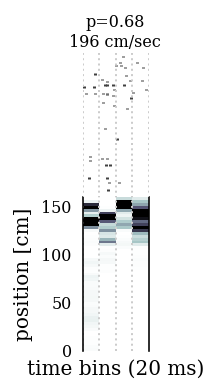

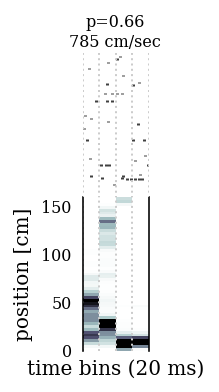

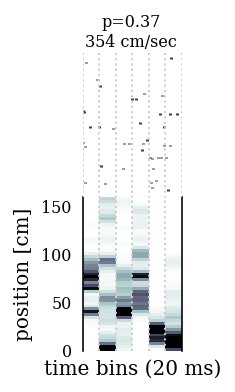

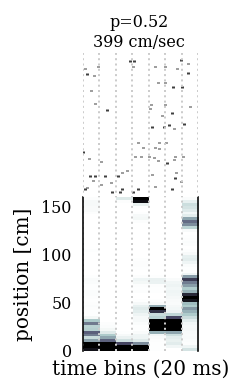

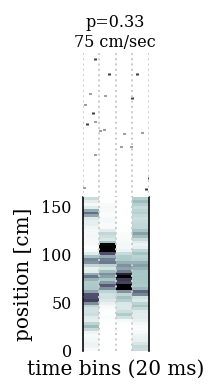

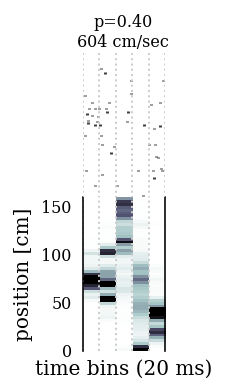

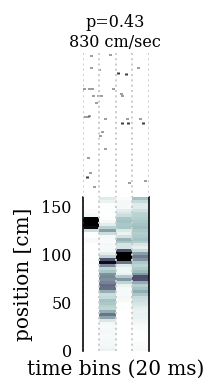

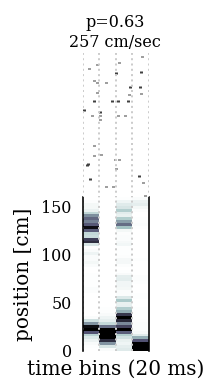

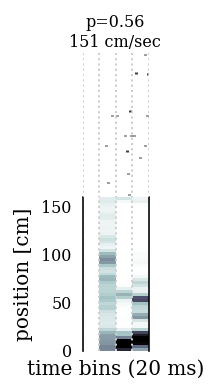

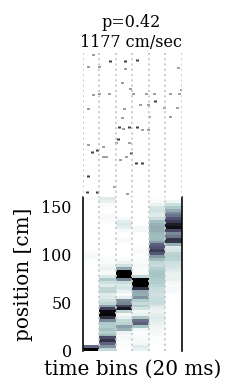

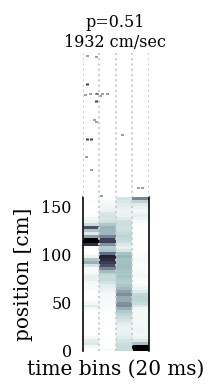

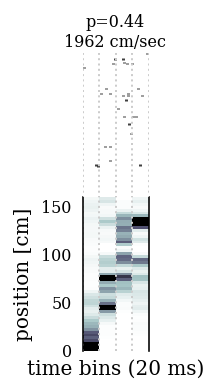

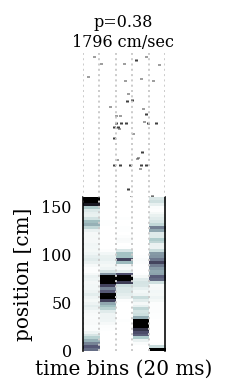

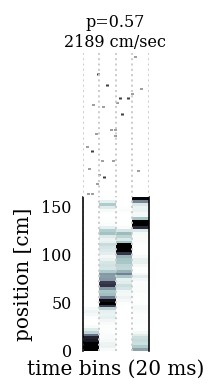

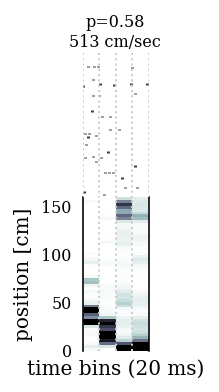

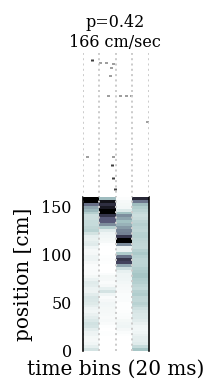

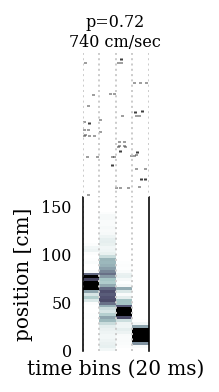

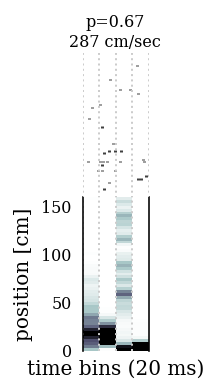

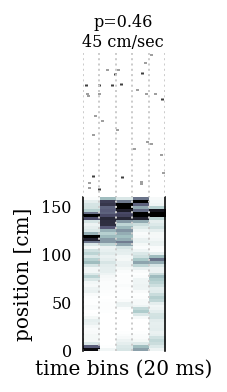

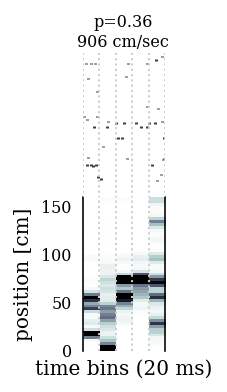

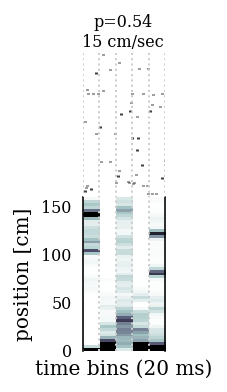

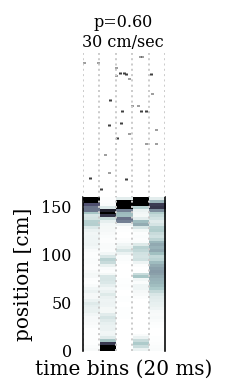

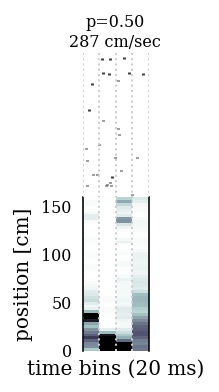

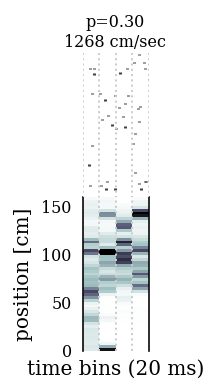

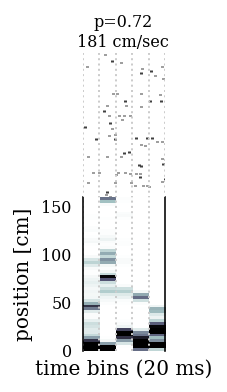

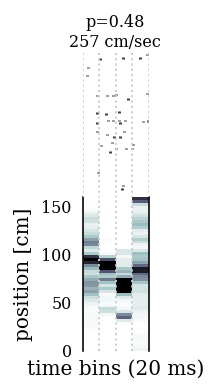

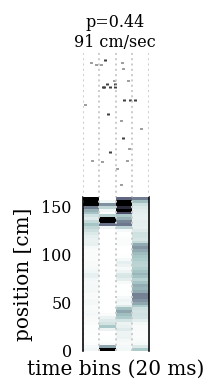

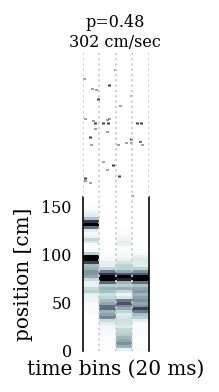

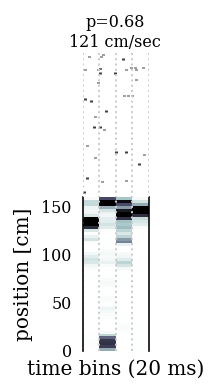

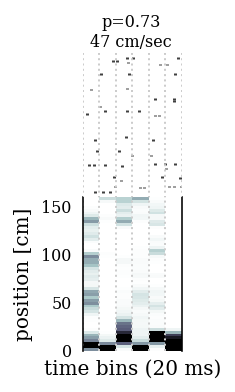

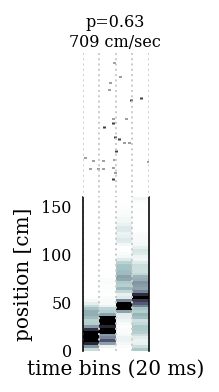

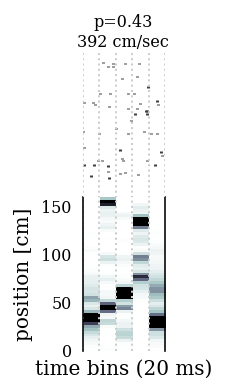

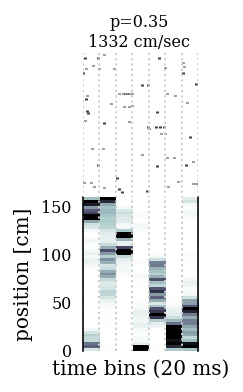

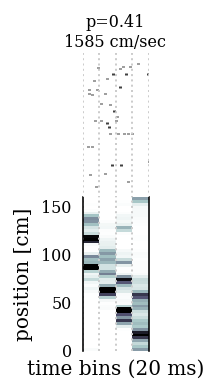

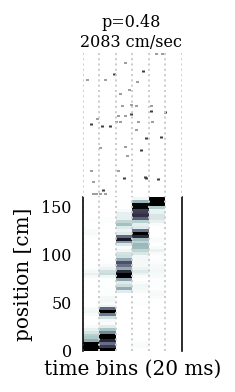

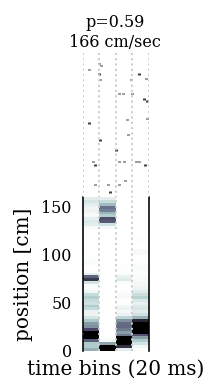

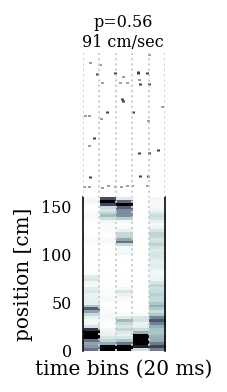

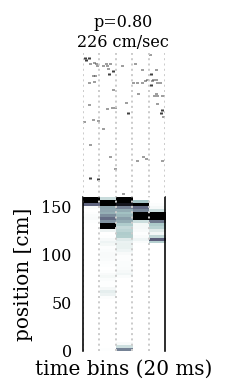

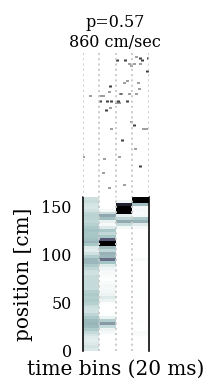

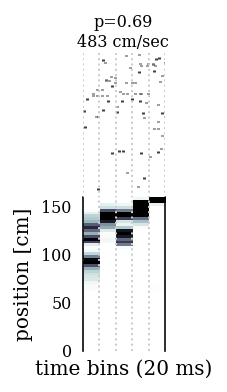

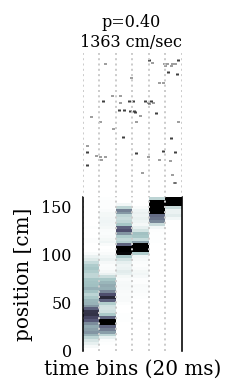

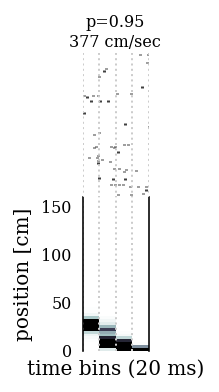

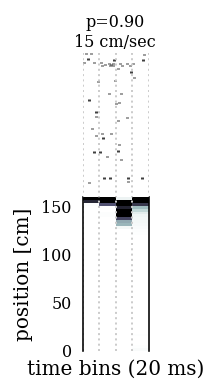

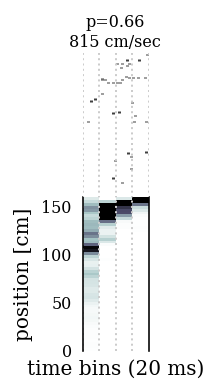

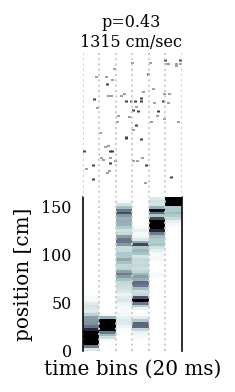

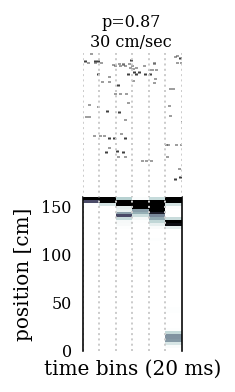

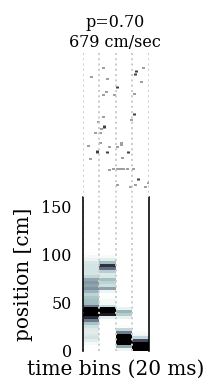

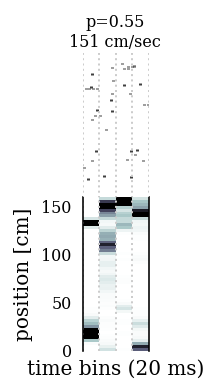

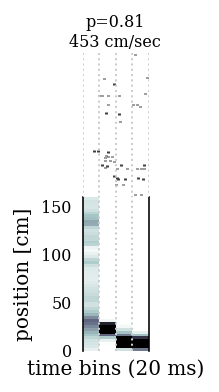

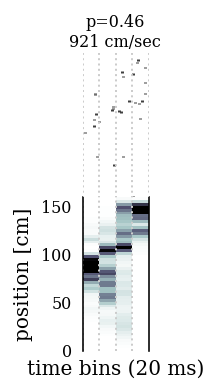

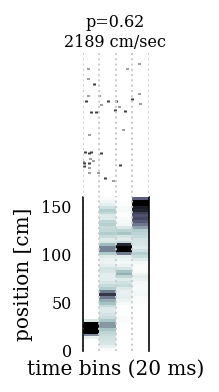

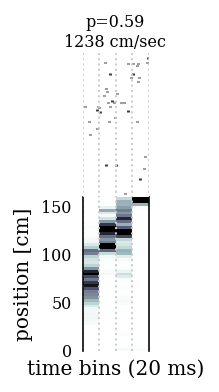

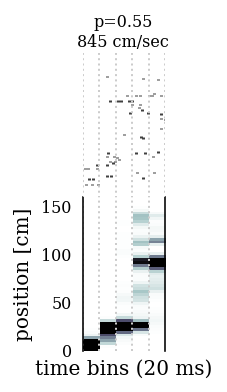

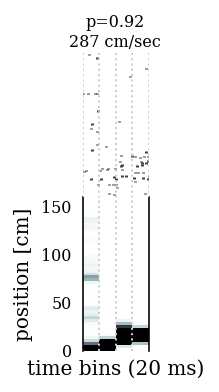

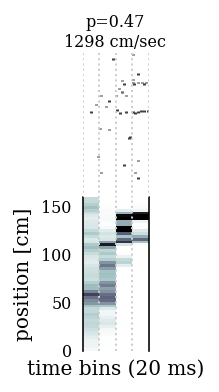

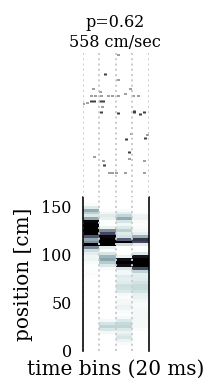

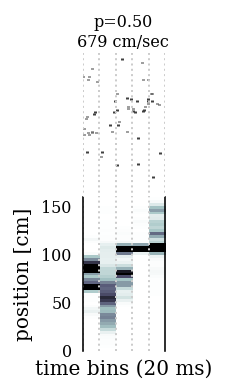

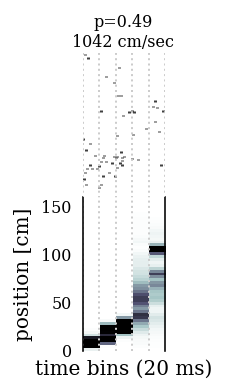

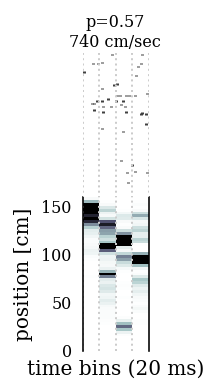

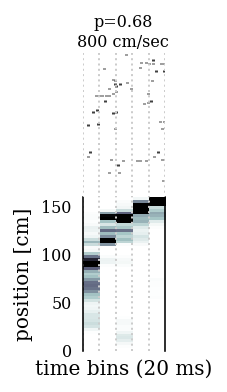

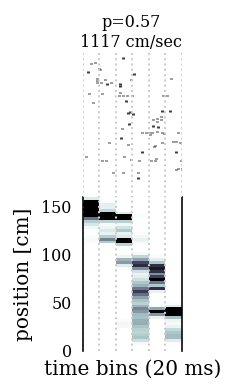

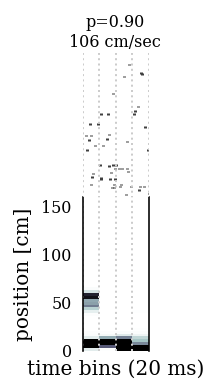

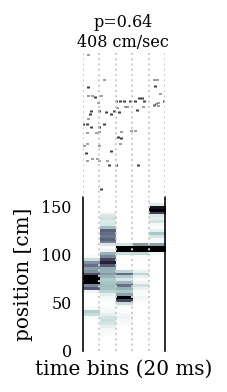

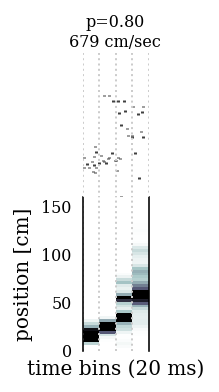

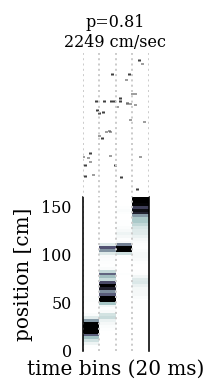

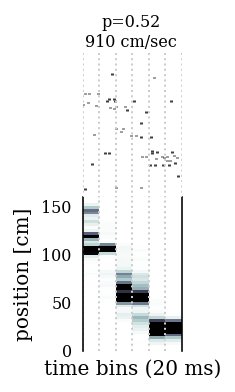

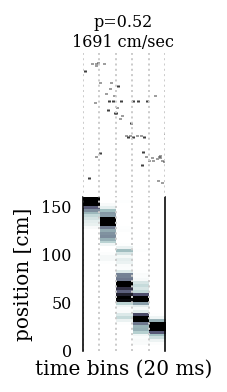

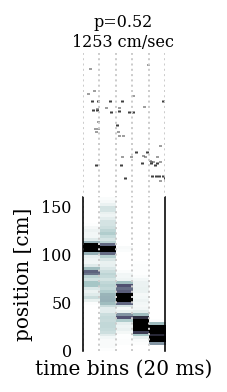

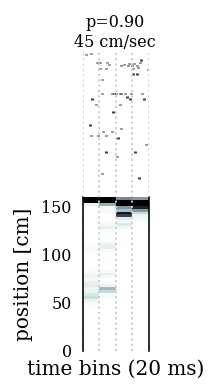

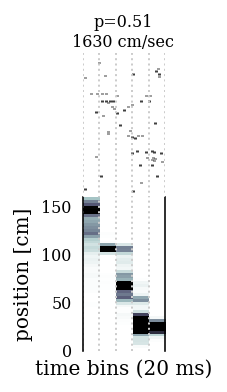

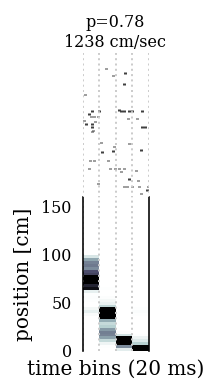

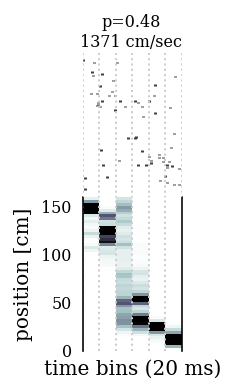

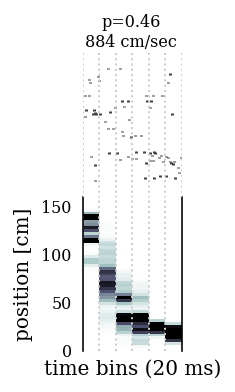

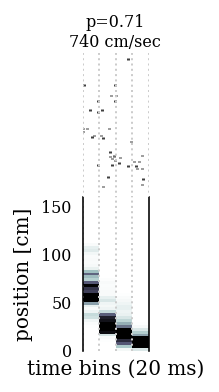

In [6]:
import warnings
warnings.filterwarnings("ignore")

idxs = np.where((results['df']['score_pval_col_cycle']<0.05))[0]

for idx in idxs:   
    idx = int(idx)   
    if isinstance(idx, int):
        title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
    else:
        title = ""
    ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                            results['sta_placecells'],
                                            results['tc'],
                                            results['tc'],
                                            vmax=.1,
                                            title_str=title)           
    fig.savefig(os.path.join(fig_save_path,'replay_examples',str(idx)+'_.png'),dpi=300,bbox_inches='tight')
    plt.close(fig)

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nelpy.plotting as npl
import nelpy as nel

def plot_all_PBEs(bst, spiketrainarray, tuningcurve, tc_placecells, idx=None, title_str=None,vmax=.1):
    if idx is not None:
        bst = bst[idx]
    st = spiketrainarray
    tc = tuningcurve
    tc_placecells = tc_placecells

    no = tc_placecells.get_peak_firing_order_ids()
    st.reorder_units_by_ids(no, inplace=True)

    st_cut = st[bst.support]
    st_cut._support = bst.support # hacky fix so that we can plot events out of order
    st_cut = nel.utils.collapse_time(st_cut)

    # decode neural activity
    posterior, bdries, mode_pth, mean_pth = nel.decoding.decode1D(bst=bst, ratemap=tc, xmax=120)
    
    width,height = functions.set_size('thesis', fraction=.25, subplots=(3, 1))

#     with npl.FigureManager(show=True, figsize=(0.2*bst.n_bins,4)) as (fig, ax):
    with npl.FigureManager(show=True, figsize=(width*bst.n_bins*.1,height)) as (fig, ax):

        npl.utils.skip_if_no_output(fig)

        pixel_width = 0.5
        if vmax == False:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax, rasterized=True)
        else:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax,vmax=vmax, rasterized=True)
#         npl.utils.yticks_interval(310)
        npl.utils.no_yticks(ax)
        # plt.imshow(posterior, cmap=plt.cm.Spectral_r, interpolation='none', aspect='auto')
        ax.vlines(np.arange(bst.lengths.sum())-pixel_width, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
        ax.vlines(np.cumsum(bst.lengths)-pixel_width, *ax.get_ylim(), lw=1)

        ax.set_xlim(-pixel_width, bst.lengths.sum()-pixel_width)

        event_centers = np.insert(np.cumsum(bst.lengths),0,0)
        event_centers = event_centers[:-1] + bst.lengths/2 - 0.5

        ax.set_xticks(event_centers)
        if idx is not None:
            ax.set_xticklabels(idx)
        else:
            ax.set_xticklabels(np.arange(bst.n_epochs))

        npl.utils.no_xticks(ax)
#         npl.utils.clear_left_right(ax)
        npl.utils.clear_top_bottom(ax)
        
        divider = make_axes_locatable(ax)
        axRaster = divider.append_axes("top", size=1, pad=0)

        npl.rasterplot(st_cut, vertstack=True, ax=axRaster, lh=1.25)
        axRaster.set_xlim(st_cut.support.time.squeeze())
        bin_edges = np.linspace(st_cut.support.time[0,0],st_cut.support.time[0,1], bst.n_bins+1)
        axRaster.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8',zorder=-1000)
#         axRaster.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')
        npl.utils.no_xticks(axRaster)
        npl.utils.no_xticklabels(axRaster)
        npl.utils.no_yticklabels(axRaster)
        npl.utils.no_yticks(axRaster)
        ax.set_ylabel('position [cm]')
        ax.set_xlabel('time bins (20 ms)')
        if title_str:
            fig.suptitle(title_str,fontsize=8)
        npl.utils.clear_left_right(axRaster)
#         npl.utils.clear_right(axRaster)
        npl.utils.clear_top_bottom(axRaster)
    return ax,fig

In [ ]:
def load_data(sessions):
    df_session = []
    df = []
    for session in sessions:
        with open(session, 'rb') as f:
            results = pickle.load(f)

        for area in results.keys():
            if len(results[area]) == 0:
                continue
            # put together event by event df
            current_df = results[area]['df']
            # make sure the area is correct
            current_df.area = area
            df.append(current_df)

            df_session_temp = pd.DataFrame()        
            # put together session by session df
            df_session_temp['session'] = [results[area]['session']]
            df_session_temp['decoding_r2'] = [results[area]['decoding_r2']]
            df_session_temp['decoding_r2_pval'] = [results[area]['decoding_r2_pval'][0]]
            df_session_temp['decoding_median_error'] = [results[area]['decoding_median_error']]
            df_session_temp['total_units'] = [results[area]['total_units']]
            df_session_temp['area'] = area
            
            df_session.append(df_session_temp)
        
    df = pd.concat(df) 

    df_session = pd.concat(df_session) 
    df_session = add_group_affiliation(df_session)
    rat = [s.split('_')[0] for s in df_session.session]
    df_session['rat']=rat

    print(df_session.keys())

    print(df.keys())

load_data(sessions)